<a href="https://colab.research.google.com/github/kelvynlukito/MachineLearning_Regression-with-Bagging/blob/main/Regression_Bagging_MPG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
# Read Dataset
df = pd.read_csv("/content/autos_mpg.csv")
df = df.drop(['car_name'],axis=1)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


# **Data Preprocessing**

In [ ]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
pd.isnull(df).isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [ ]:
pd.isna(df).sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

23.514572864321607
23.0
0    13.0
dtype: float64


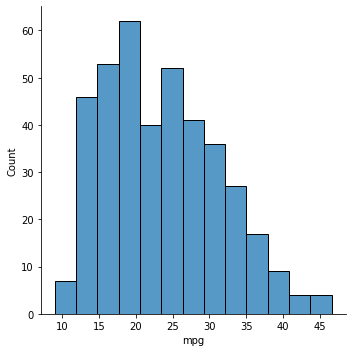

In [ ]:
# Show data distribution 
sns.displot(df['mpg'])
from statistics import median
from statistics import mean
from statistics import mode
print(df['mpg'].mean())
print(df['mpg'].median())
print(df['mpg'].mode())

In [ ]:
# Changes all datatype into numeric
from statistics import median
df['horsepower'] = pd.to_numeric(df['horsepower'],errors = 'coerce')
df['mpg'] = df['mpg'].astype(int)
df['displacement'] = df['displacement'].astype(int)
df['acceleration'] = df['acceleration'].astype(int)
print(df.dtypes)

mpg               int64
cylinders         int64
displacement      int64
horsepower      float64
weight            int64
acceleration      int64
model_year        int64
origin            int64
dtype: object


Based on reference https://www.naukri.com/learning/articles/handling-missing-data-mean-median-mode/,
1.   Mean-It is preferred if data is numeric and not skewed.
2.   Median-It is preferred if data is numeric and skewed.
3.   Mode-It is preferred if the data is a string(object or numeric.




In [ ]:
# Replace all null / NaN / ? value based on the data distribution
df['horsepower'] = df['horsepower'].replace(['?'], 'null')
pd.isna(df).sum()
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median(),inplace=False)
df[['horsepower']]
pd.isna(df).sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [ ]:
# Checking all Variances for each feature
df.var()

mpg                 60.101901
cylinders            2.893415
displacement     10872.441407
horsepower        1460.969052
weight          717140.990526
acceleration         7.528581
model_year          13.672443
origin               0.643292
dtype: float64

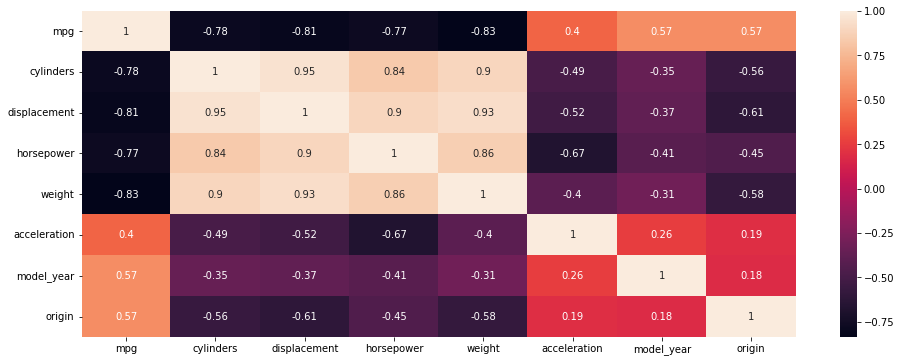

In [ ]:
# Checking all correlation betwwen features
df.corr()
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(),annot=True)

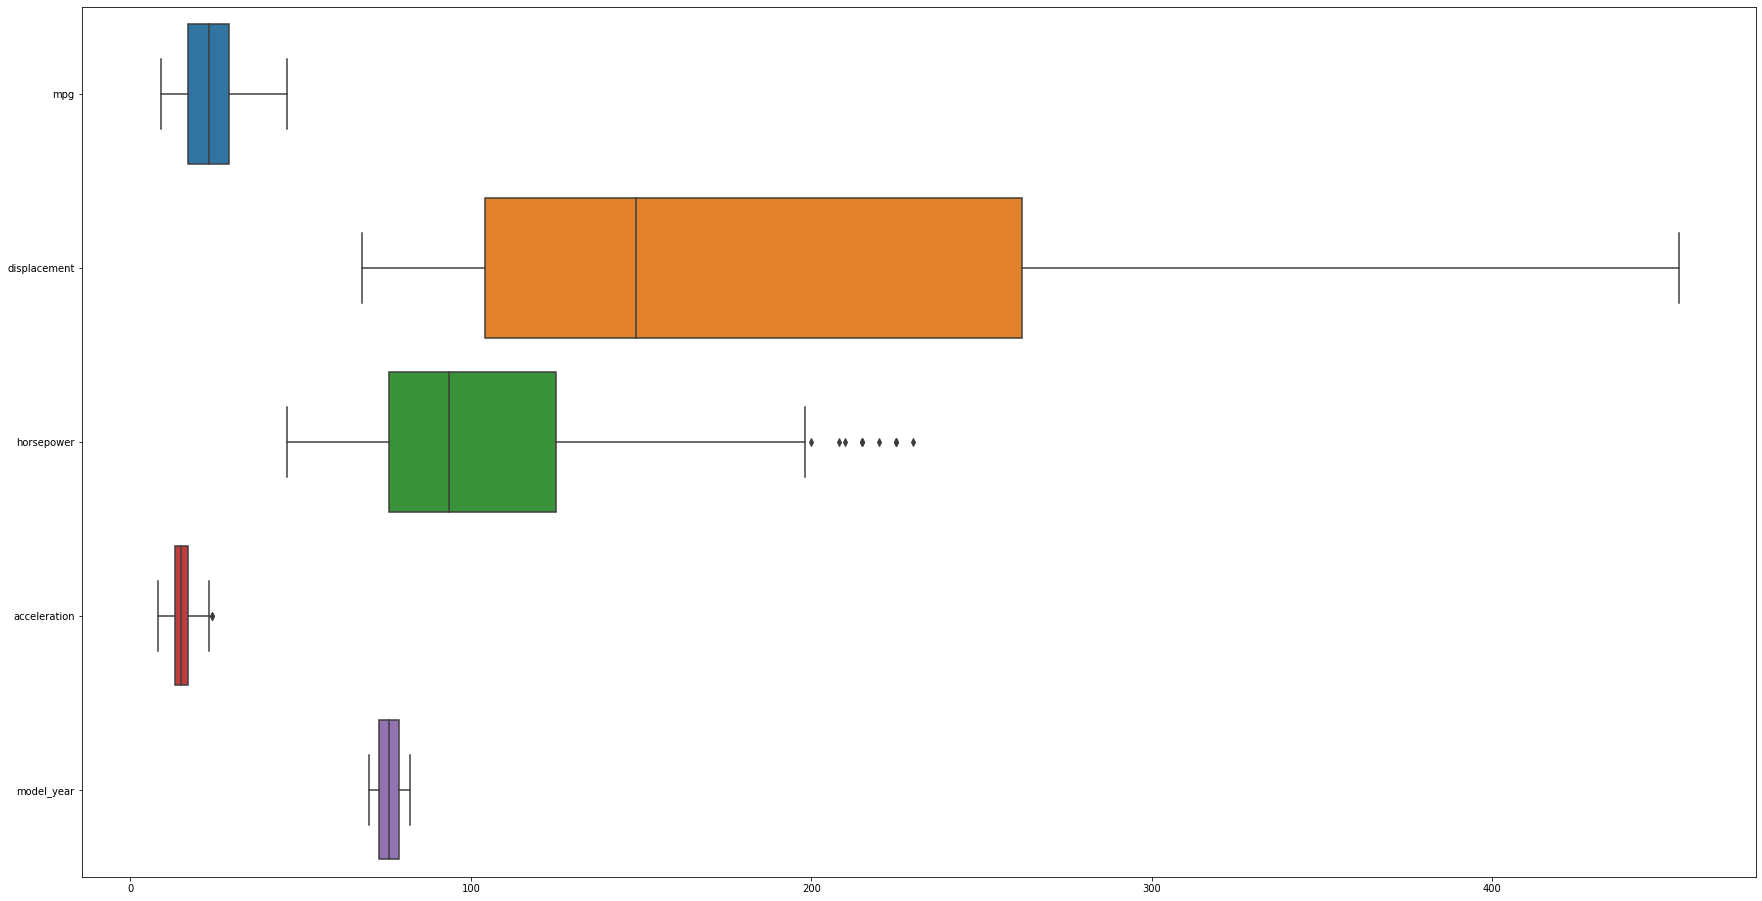

In [ ]:
# Box Plot
plt.figure(figsize=(30,16))
plot = df[['mpg','displacement','horsepower','acceleration','model_year']]
sns.boxplot(data=plot,orient="h",fliersize=5)

In [ ]:
# Remove Outliers
def outliers(data, column):
  Q1 = data[column].quantile(0.30)
  Q3 = data[column].quantile(0.70)
  IQR = Q3 - Q1

  lowBound = Q1 - 1.5 * IQR
  upBound = Q3 + 1.5 * IQR 

  lis = df.index[(data[column] < lowBound) | (data[column] > upBound)]

  return lis

def replaceOutliers(data):
  idxList = []

  for column in data:
    idxList.extend(outliers(data, column))
    idxList = sorted(idxList)
    mean = data[column].mean()
    for index in idxList:
      data[column][index] = mean
    
    idxList = []
  

  return data

replaceOutliers(df)

<ipython-input-127-154561a2059a>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][index] = mean


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18,8,307,130.00000,3504,12,70,1
1,15,8,350,104.30402,3693,11,70,1
2,18,8,318,150.00000,3436,11,70,1
3,16,8,304,150.00000,3433,12,70,1
4,17,8,302,140.00000,3449,15,70,1
...,...,...,...,...,...,...,...,...
393,27,4,140,86.00000,2790,15,82,1
394,23,4,97,52.00000,2130,15,82,2
395,32,4,135,84.00000,2295,11,82,1
396,28,4,120,79.00000,2625,18,82,1


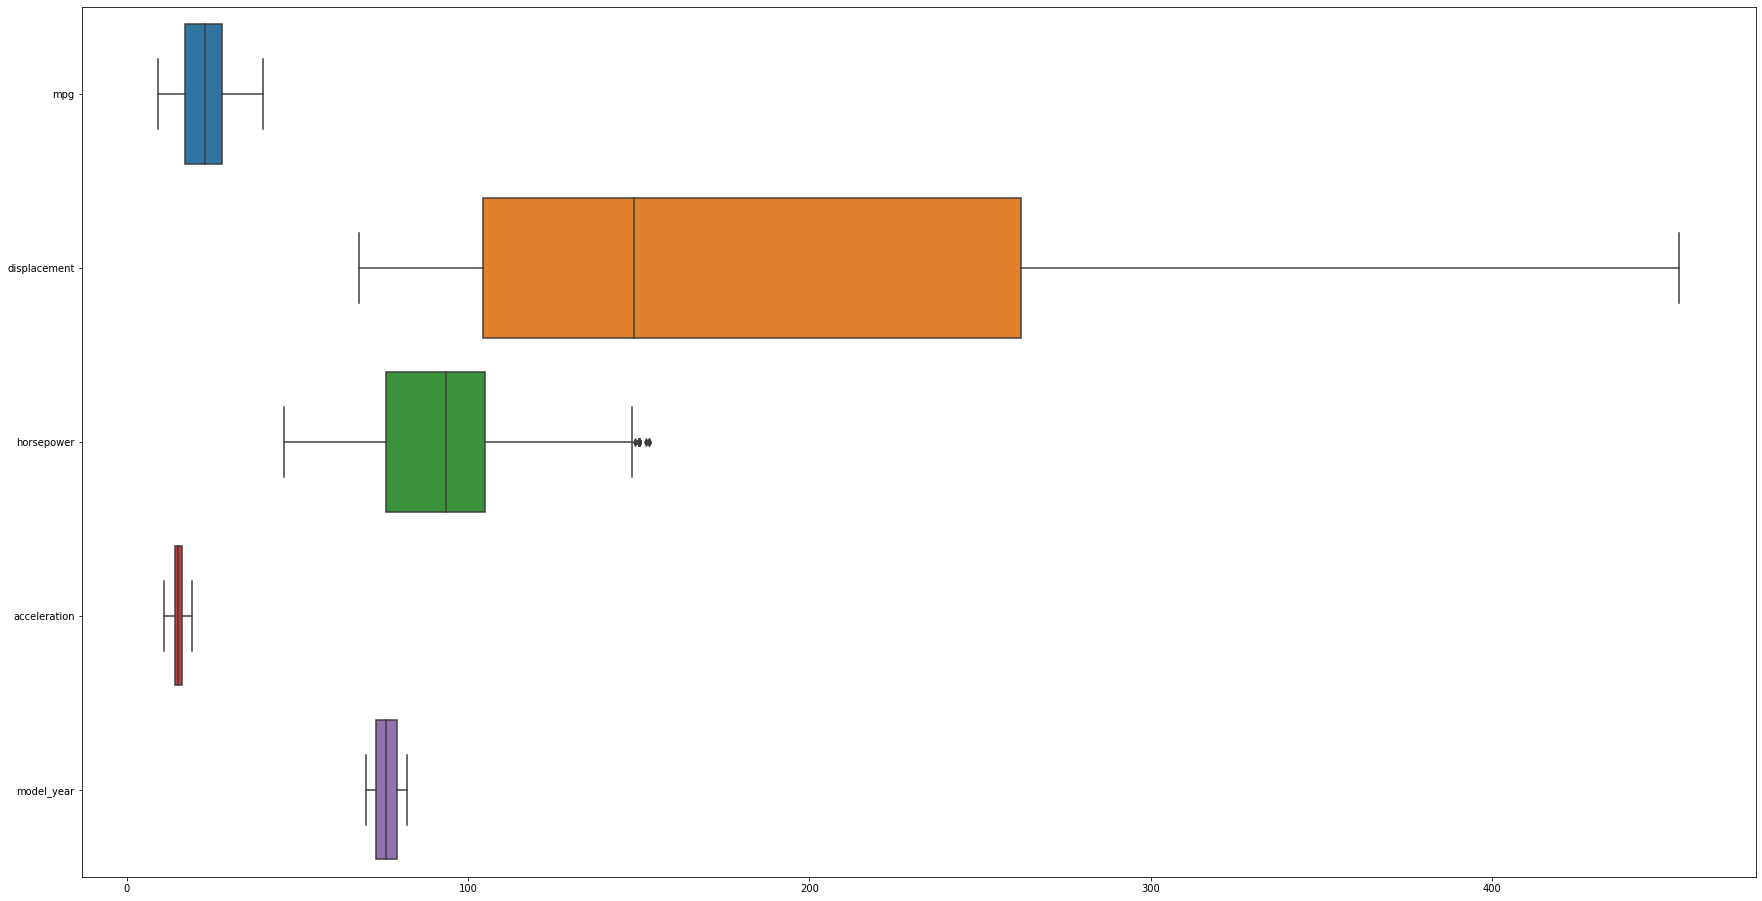

In [ ]:
# Box Plot
plt.figure(figsize=(30,16))
plot = df[['mpg','displacement','horsepower','acceleration','model_year']]
sns.boxplot(data=plot,orient="h")

In [ ]:
# Import preprocessing library for normalized all value of the dataset
from sklearn.preprocessing import MinMaxScaler
scaled = MinMaxScaler()

**Model That Used in this Study Case is SVM, Linear Regression and KNN**

In [ ]:
# Import all support library 
from sklearn import metrics
from math import sqrt
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

In [ ]:
# Seperated trining data and testing data
X = df.drop(['mpg'],axis=1)
y = df['mpg']
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=10,test_size=0.2)
x_train_scaled = scaled.fit_transform(x_train)
x_test_scaled = scaled.fit_transform(x_test)

In [ ]:
"""
X, y = make_regression(n_samples=70, n_features=7,
                       n_informative=2, n_targets=1,
                       random_state=10, shuffle=False)

regr_svr = BaggingRegressor(base_estimator=SVR(),n_estimators=200, random_state=0, max_samples=0.8, oob_score=True).fit(X,y)
df_svr = df.drop(['mpg'],axis=1)
result_pred = regr_svr.predict(df_svr)
# Evaluate the Model
evaluation_r2 = metrics.r2_score(df['mpg'],result_pred)
print(evaluation)
"""

"\nX, y = make_regression(n_samples=70, n_features=7,\n                       n_informative=2, n_targets=1,\n                       random_state=10, shuffle=False)\n\nregr_svr = BaggingRegressor(base_estimator=SVR(),n_estimators=200, random_state=0, max_samples=0.8, oob_score=True).fit(X,y)\ndf_svr = df.drop(['mpg'],axis=1)\nresult_pred = regr_svr.predict(df_svr)\n# Evaluate the Model\nevaluation_r2 = metrics.r2_score(df['mpg'],result_pred)\nprint(evaluation)\n"

# **Support Vector Regression** (Gausah)


In [ ]:
regr_svr = BaggingRegressor(base_estimator=SVR(),n_estimators=200, random_state=0, max_samples=0.8, oob_score=True).fit(x_train, y_train)
df_svr = df.drop(['mpg'],axis=1)
result_pred = regr_svr.predict(df_svr)
# Evaluate the Model
evaluation_r2 = metrics.r2_score(df['mpg'],result_pred)
evaluation_MSE = metrics.mean_squared_error(df['mpg'],result_pred)
evaluation_RMSE = sqrt(metrics.mean_squared_error(df['mpg'],result_pred))
print(f'R2   : {evaluation_r2}')
print(f'MSE  : {evaluation_MSE}')
print(f'RMSE : {evaluation_RMSE}')

In [ ]:
regr_svr.predict(df_svr)

# **Linier Regression**

In [139]:
regr_ln = BaggingRegressor(base_estimator=LinearRegression(),n_estimators=200, random_state=0, max_samples=0.8, oob_score=True).fit(x_train, y_train)
df_ln = df.drop(['mpg'],axis=1)
result_pred = regr_ln.predict(df_svr)
# Evaluate the Model
evaluation_r2 = metrics.r2_score(df['mpg'],result_pred)
evaluation_MSE = metrics.mean_squared_error(df['mpg'],result_pred)
evaluation_RMSE = sqrt(metrics.mean_squared_error(df['mpg'],result_pred))
print(f'R2   : {evaluation_r2}')
print(f'MSE  : {evaluation_MSE}')
print(f'RMSE : {evaluation_RMSE}')

R2   : 0.8154633194404491
MSE  : 9.705765685057894
RMSE : 3.1154077879240614


In [ ]:
regr_ln.predict(df_ln)

# **KNN**

In [ ]:
regr_KNN = BaggingRegressor(base_estimator=KNeighborsRegressor(),n_estimators=200, random_state=0, max_samples=0.8, oob_score=True).fit(x_train, y_train)
df_KNN = df.drop(['mpg'],axis=1)
result_pred = regr_ln.predict(df_KNN)
# Evaluate the Model
evaluation_r2 = metrics.r2_score(df['mpg'],result_pred)
evaluation_MSE = metrics.mean_squared_error(df['mpg'],result_pred)
evaluation_RMSE = sqrt(metrics.mean_squared_error(df['mpg'],result_pred))
print(f'R2   : {evaluation_r2}')
print(f'MSE  : {evaluation_MSE}')
print(f'RMSE : {evaluation_RMSE}')

In [ ]:
regr_KNN.predict(df_KNN)